# COGS 108 - Final Project 

# Overview

**1. Research Question**

Our research question 

**2. Background and Prior Work**

The project’s significance

**3. Hypothesis**

Our hypothesis

**4. Datasets**

The data sources

**5. Setup**

Imports packages

**6. Data Cleaning**

Datasets are loaded, merged, cleaned for further analysis. 

**7. Data Analysis & Results**

Visualization and linear regression analysis about the relationships between different attributes and movie revenue. Prediction of movie revenue using multiple linear regression and non-linear regression. Models are tested by cross-validation. 

**8. Ethics & Privacy**

Consideration regarding to privacy and ethics as well as possible biases of our analysis and prediction. 

**9. Conclusion & Discussion**

# Names

- Roger Cheng
- Deyin Chen
- Haoyin Xu
- Suzhou Yang
- Sowmya Parthiban

# Group Members IDs

- A14743993
- A13790839
- A92099144
- A15305349
- A92090309


# Research Question

Ever since the early 1900s, movies (or so called "moving pictures") have became a popular leisure activity. Due to the increased financial prosperity, people had more disposable money to allow themselves attending the cinemas far more regularly than the previous decade. As time progresses, styles and theme of movies evolve drastically due to both technological development and cultural evolution. Audience's favorite genres of movies have evolved accordingly as well. Thus, in this project, we are interested in seeing **what components have attributed to a movie's revenue in the recent decade. Examining a movie's components such as the genre, production country, title length, runtime, release time, vote average, budget, etc., we want to see how each component would affect the final revenue**. We believe that revenue could represent the popularity of a movie and thus it helps us to visualize the evolution of audience's interest in the recent decade.


# Background and Prior Work

Films have been recognized to have artistic, educational and commercial values for a society. They are also a way to express and popularize current thoughts, ideas and concerns. More importantly, they indicate the development of technology and dominating ideology of the society. Big film companies in the world usually put billions of dollars into filmmaking as well as advertisement. However, over 70% of the films made negative profit, while the total average revenue of the film industry was around $10 billion each year [1]. Therefore, the high-risk but high-profit property of the films makes the study about factors contributing to a successful film and an accurate prediction method for the film revenue extremely desired for the filmmakers and investigators to make better investment decisions on film production and advertisement. 

It would also be a huge benefit if there could be a prediction method of a successful film with a high accuracy. Indeed, there have been many studies about films trying to get a good prediction method. Studies found that multiple factors could be related to a movie’s revenue. Although specific weights were not reported for most studies, they found that factors such as cast, budget, film review, actors, directors and genre contributed to the revenue [2, 3]. In particular, a study with modest prediction ability found that horror movies were the most popular movies and the Motion Picture Association of America film rating system had the largest contribution to domestic gross in the US [4]. 

Among the recent studies, Nithin et al. generated one of the most accurate models to predict the film revenue with around 51 percent accuracy using IMDB data and linear regression. However, they admitted the accuracy was not high enough for industrial use and suggested to use a larger training set [2]. Apte et al. also found that generally low revenue movies had a much lower prediction accuracy compared to high revenue movies due the incompleteness of data from global box office, and some genres might not have enough samples for them to train their model and resulted in a low accuracy [3]. Moreover, the data the groups used to train their models was out of date. Due to the inevitable changes in audience’s tastes, using data only from 2000 to 2012 would make the model less accurate to predict film revenue after 2019. 

Therefore, in this project, we will combine and organize two datasets that contain information about movies extracted from The Movie Database (TMDb) and MovieLens. These datasets have more than 50,000 entries in total and information up to July 2017. Our goal is to use these up-to-date datasets and a better algorithm to analyze the weights of factors that determine the revenue and to generate a model that will have a higher accuracy in revenue prediction. 



### References:
- [1] "The Numbers - Movie Market Summary 1995 to 2011." The Numbers - Movie Box
Office Data, Film Stars, Idle Speculation. Web. <http://www.the-numbers.com/market/>.
- [2] NithinV, R., & Babu, S. (2017). Predicting Movie Success Based On Imdb Data.
- [3] Apte, N., Forssell, M., & Sidhwa, A. (2011). Predicting Movie Revenue. CS229, Stanford University.
- [4] Hu, X. (n.d.). Predicting Domestic Gross of Movies. Retrieved from https://www.stat.berkeley.edu/~aldous/Research/Ugrad/ugrad_res_old.html.


# Hypothesis


Our hypothesis is that quantitative predictors such as movie's runtime, budget, popularity score and viewer rating of the quality of the movie on a scale of 10 have a statistically significant effect on predicting the movie's revenue. 

# Dataset(s)

### Dataset 1
- Dataset Name: The Movies Dataset
- Link to the dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset/downloads/the-movies-dataset.zip/7
- Number of observations: 45467

All movies released before
and in July 2017 were collected from the Full MovieLens Dataset. 45467 movies were included in this dataset with each surveyed for its
cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies,
countries, TMDb vote counts and vote averages.

### Dataset 2
- Dataset Name: TMDB 5000 Movie Dataset
- Link to the dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_movies.csv
- Number of observations: 5000

5000 movies released between 1916 and 2017 were randomly extracted from The Movie Database (TMDb). Each movie was surveyed for its keywords, overview, production company, crew, cast,
runtime, average rating, number of ratings, and revenue.

# Setup

In [60]:
# importing necessary packages for data editing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# important packages for data analysis
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

In [61]:
# import both dataset into a pandas dataframe
tmdb_df = pd.read_csv('tmdb_5000_movies.csv')
tmdb_df2 = pd.read_csv('movies_metadata.csv')

# visualize one of the data table
tmdb_df

/Users/winniexu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

As shown from the previous section, the format of most of the cells was very messy. For instance, there were many random symbols and random information like "id" under the *"production_companies"* column. The same scenerio occured with *"production_countries"* and many other columns as well. Thus, we needed to clean up the format and extract the needed information from these cells. 

Also, much of the information were redundant such as the "spoken language" column. Thus, we needed to drop all the unnecessary columns in order to facilitate our analysis process. During this process, we also dropped all the rows that doesn't contain a value for "revenue" column. 

Finally, we merged both data set into one by their title, genres, original language, production countries, release date, runtime, popularity, vote count, vote average, budget and revenue.

In [62]:
# Method to help extracting the genres information from cells
def trim_genres(genres):
    g_list = []
    b = 0
    a = 0
    while (a != -1 and b != -1):
        a = genres.find("name")
        b = genres.find("}")
        g_list.append(genres[a+8:b-1])
        genres = genres [b+1:]
        if (len(genres) == 1):
            break
    g_list.sort()
    return g_list

In [63]:
# dropping unneeded columns and the rows with missing data
tmdb_df = tmdb_df.drop(columns = ['homepage','id','production_companies','keywords','overview','tagline','status', 'original_title','spoken_languages'])
tmdb_df = tmdb_df.dropna()

# Transform the genres and production_countries column to only contains the information we needed
tmdb_df['genres'] = tmdb_df['genres'].apply(trim_genres)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(trim_genres)
tmdb_df['genres'] = tmdb_df['genres'].apply(tuple)
tmdb_df['production_countries'] = tmdb_df['production_countries'].apply(tuple)

In [64]:
# same cleanning procedure for the second data set
tmdb_df2 = tmdb_df2.drop(columns = ['adult','belongs_to_collection','homepage', 'id', 'imdb_id','status', 'tagline','video','original_title','poster_path','production_companies','spoken_languages','overview' ])
tmdb_df2 = tmdb_df2.dropna()
tmdb_df2['genres'] = tmdb_df2['genres'].apply(trim_genres)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(trim_genres)
tmdb_df2['genres'] = tmdb_df2['genres'].apply(tuple)
tmdb_df2['production_countries'] = tmdb_df2['production_countries'].apply(tuple)
tmdb_df2 = tmdb_df2.fillna(0)

# change the type of these columns
tmdb_df2.budget = tmdb_df2.budget.astype(np.int64)
tmdb_df2.popularity = tmdb_df2.popularity.astype(np.float64)
tmdb_df2.revenue = tmdb_df2.revenue.astype(np.int64)
tmdb_df2.vote_count = tmdb_df2.vote_count.astype(np.int64)



In [65]:
# merge two data set into one and drop the duplicated ones, save it as a new csv file
merge_df = pd.merge(tmdb_df,tmdb_df2,on = ['budget','genres','original_language','popularity','production_countries','release_date','revenue','runtime','title','vote_average','vote_count'] , how = 'outer')
merge_df = merge_df[merge_df['revenue'] != 0]
merge_df = merge_df.drop_duplicates(subset = 'title', keep = 'first')
merge_df=merge_df[['title','genres','original_language','production_countries','release_date','runtime','popularity','vote_count','vote_average','budget','revenue']]
merge_df.to_csv('trimmed_data.csv')
# visulize the new dataset
merge_df

,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"(Action, Adventure, Fantasy, Science Fiction)",en,"(United Kingdom, United States of America)",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
1,Pirates of the Caribbean: At World's End,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2007-05-19,169.0,139.082615,4500,6.9,300000000,961000000
2,Spectre,"(Action, Adventure, Crime)",en,"(United Kingdom, United States of America)",2015-10-26,148.0,107.376788,4466,6.3,245000000,880674609
3,The Dark Knight Rises,"(Action, Crime, Drama, Thriller)",en,"(United States of America,)",2012-07-16,165.0,112.312950,9106,7.6,250000000,1084939099
4,John Carter,"(Action, Adventure, Science Fiction)",en,"(United States of America,)",2012-03-07,132.0,43.926995,2124,6.1,260000000,284139100
5,Spider-Man 3,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2007-05-01,139.0,115.699814,3576,5.9,258000000,890871626
6,Tangled,"(Animation, Family)",en,"(United States of America,)",2010-11-24,100.0,48.681969,3330,7.4,260000000,591794936
7,Avengers: Age of Ultron,"(Action, Adventure, Science Fiction)",en,"(United States of America,)",2015-04-22,141.0,134.279229,6767,7.3,280000000,1405403694
8,Harry Potter and the Half-Blood Prince,"(Adventure, Family, Fantasy)",en,"(United Kingdom, United States of America)",2009-07-07,153.0,98.885637,5293,7.4,250000000,933959197
9,Batman v Superman: Dawn of Justice,"(Action, Adventure, Fantasy)",en,"(United States of America,)",2016-03-23,151.0,155.790452,7004,5.7,250000000,873260194


# Data Analysis & Results

Among all the categories contained in our cleaned dataset, we selected genre, production country, title length, movie runtime, release month,vote average and movie budget as the potential factors influencing the final revenue of a newly released movie. First, we inspected the direct linear correlation between the movie revenue and these potential factors individually. The linear correlation is determined by the p-value and goodness of fit generated from the OLS Regression function. Next, we filter out most correlated categories for further multiple linear regression. This step would tell us about the possible interrelations among the categpries themselves. The goodness of fit was checked again and a non-linear regression was performed to test if there is a better fitting method.

## Data set sorted according to the revenue

In [66]:
# open the trimmed data, sort the order by 'revenue' column to facilize the visualization generated 
# on the following cell, a sample table after sorting is shown
df = pd.read_csv('trimmed_data.csv',index_col = 0)
df = df.sort_values(by = ['revenue'],ascending=False)
df.head(5)

,title,genres,original_language,production_countries,release_date,runtime,popularity,vote_count,vote_average,budget,revenue
0,Avatar,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United Kingdom', 'United States of America')",2009-12-10,162.0,150.437577,11800,7.2,237000000,2787965087
31274,Star Wars: The Force Awakens,"('Action', 'Adventure', 'Fantasy', 'Science Fi...",en,"('United States of America',)",2015-12-15,136.0,31.626013,7993,7.5,245000000,2068223624
25,Titanic,"('Drama', 'Romance', 'Thriller')",en,"('United States of America',)",1997-11-18,194.0,100.025899,7562,7.5,200000000,1845034188
16,The Avengers,"('Action', 'Adventure', 'Science Fiction')",en,"('United States of America',)",2012-04-25,143.0,144.448633,11776,7.4,220000000,1519557910
28,Jurassic World,"('Action', 'Adventure', 'Science Fiction', 'Th...",en,"('United States of America',)",2015-06-09,124.0,418.708552,8662,6.5,150000000,1513528810


Here, we plotted a bar graph in order to visualize the genres of the 50 most profitable movies. As the bar graph suggested, 9 movies has a combined genre of ('Action', 'Adventure', 'Fantasy'). 8 movies have a combined genre of ('Action', 'Adventure', 'Science Fiction'). 7 movies have a combined genre of ('Adventure', 'Family', 'Fantacy'). 5 movies have a combined genre of ('Adventure', 'Animation', 'Comedy', 'Family'). It appears that these combined genres have a good correlation with the movie revenue.

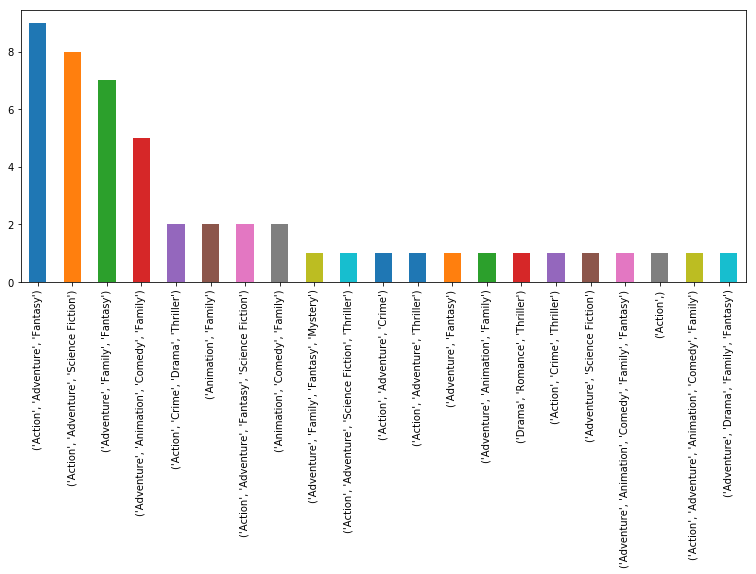

In [67]:
pd.value_counts(df.head(50)['genres']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

## Linear Model Of Movie Genres and Revenue

We start the analysis by first fitting the movie genres column and the revenue column. In order to check for the potential correlation with the movie revenue, we performed an OLS regression on all the combined genres included in our dataset, using an alpha value of 0.05. We found, from the OLS regression output, that the combined genres of ('Action', 'Adventure', 'Fantasy') has a p value smaller than 0.001. The combined genre of ('Action', 'Adventure', 'Science Fiction') also has a p value smaller than 0.001. The same p value applies to the combined genres of ('Adventure', 'Family', 'Fantacy'), and ('Adventure', 'Animation', 'Comedy', 'Family'). It is then confirmed that there is a correlation bvetween these genres and the movie revenue.

In [88]:
# First setting the revenue as the explanatory variable and genres as the dependent variable
# Then perform the fitting action, the result is printed. 

# The result first shows the overall data such as the R-squared value. Then on the lower portion, we first see the
# specific genre that is fitted to the revenue, and then the value of coefficient, standard deviation, error, etc. is
# shown on the following line. Notice that due to the formating issue, the coefficient value appear on the right side
# of the line above

# Due to the length of the whole summary, we only depict the first could p-value. We will also print out the top first
# p-value following the summary
outcome_1, predictors_1 = patsy.dmatrices("revenue~genres",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(str(res_1.summary())[0:2992])

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     4.506
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          6.93e-257
Time:                        23:19:32   Log-Likelihood:            -1.4508e+05
No. Observations:                7254   AIC:                         2.918e+05
Df Residuals:                    6450   BIC:                         2.973e+05
Df Model:                         803                                         
Covariance Type:            nonrobust                                         
                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [104]:
# depicting the top 10 p-value (which is the smallest 10 p-value, since it implies they are correlated)
Genres_Pvalues = pd.DataFrame(res_1.model.exog_names, columns = ['Genres'])
Genres_Pvalues['Pvalues'] =  res_1.pvalues
Genres_Pvalues = Genres_Pvalues.sort_values(by = ['Pvalues'],ascending=True)
pd.set_option('display.float_format','{:.3f}'.format)
pd.set_option('display.max_colwidth', -1)
Genres_Pvalues.head(10)

,Genres,Pvalues
96,"genres[T.('Action', 'Adventure', 'Fantasy')]",0.000
101,"genres[T.('Action', 'Adventure', 'Fantasy', 'Science Fiction')]",0.000
122,"genres[T.('Action', 'Adventure', 'Science Fiction')]",0.000
398,"genres[T.('Adventure', 'Family', 'Fantasy')]",0.000
300,"genres[T.('Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy')]",0.000
299,"genres[T.('Adventure', 'Animation', 'Comedy', 'Family')]",0.000
373,"genres[T.('Adventure', 'Drama', 'Fantasy', 'Romance')]",0.000
123,"genres[T.('Action', 'Adventure', 'Science Fiction', 'Thriller')]",0.000
400,"genres[T.('Adventure', 'Family', 'Fantasy', 'Mystery')]",0.000
439,"genres[T.('Animation', 'Comedy', 'Family')]",0.000


## Movie production countries from top 100 movie revenues

Then, we proceed to the production countries. We plotted a bar graph of the 100 most profitable movies according to their country of production. As indicated by the bar graph, more than 60 movies were produced by ('United States of America'), suggesting that the ('United States of America') is potentially correlated with the movie revenue. We used an alpha value of 0.05.

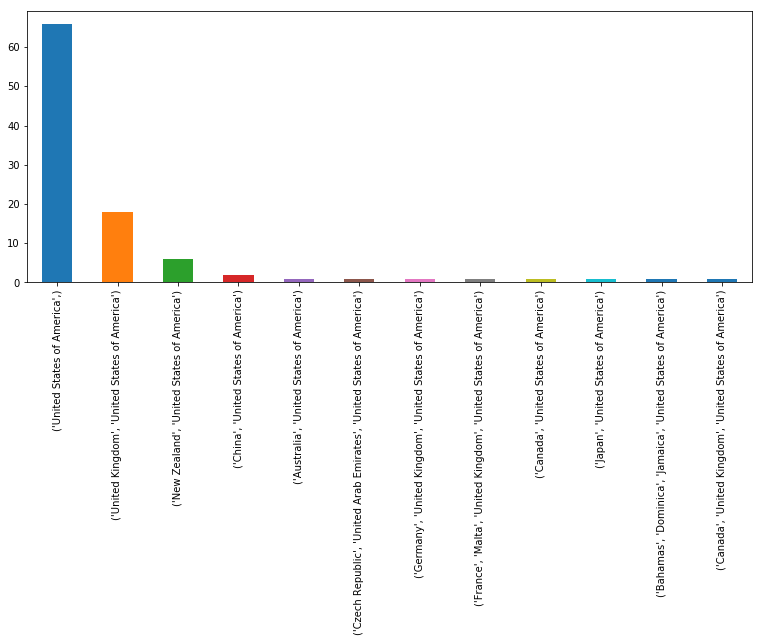

In [14]:
pd.value_counts(df.head(100)['production_countries']).plot.bar(figsize = (13, 5))
f1 = plt.gcf()

An OLS regression test was performed to analyze the correlation between each country of production and the movie revenue. As expected, the ('United States of America') has a p value smaller than 0.001.

In [86]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~production_countries",df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(str(res_1.summary())[0:3369])

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.526
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.27e-13
Time:                        23:16:37   Log-Likelihood:            -1.4627e+05
No. Observations:                7254   AIC:                         2.936e+05
Df Residuals:                    6715   BIC:                         2.973e+05
Df Model:                         538                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                            coef    std err       

## Relation between the title length and revenue

For our interest, we also analyze the correlation between title length and movie revenue. We counted the number of characters contained in each movie title, which is later designated as the title length.

In [16]:
# Extract the needed data, title length and revenue, for this analysis. Transform the title column to the count of 
# each movie title
lenth_rev = df[['title','revenue']]
lenth_rev['title'] = lenth_rev['title'].apply(len)

/Users/winniexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


A scatter plot was made for title length vs. revenue. A linear regression was thencomputed and drawn on top of the scatter plot. The final plot indicats that there is some kind of correlation between the title length and the movie revenue.

Text(0,0.5,'revenue')

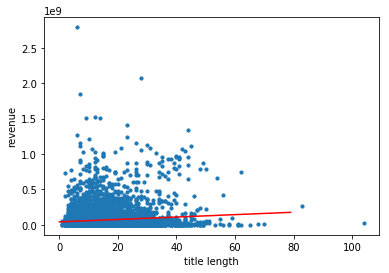

In [18]:
a1, b1 = np.polyfit(lenth_rev['title'], lenth_rev['revenue'], 1)
title_len = np.arange(0,80,dtype = 'float')
pred_rev = title_len * a1 + b1

plt.scatter(x = lenth_rev['title'], y = lenth_rev['revenue'], s=10)
plt.plot(title_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('title length')
plt.ylabel('revenue')

To confirm this, we used an OLS regression test to analyze the correlation between the title length and the movie revenue, with an alpha value of 0.05. The returned p value is smaller than 0.001, suggesting that there is a correlation between the title length and movie revenue. Yet,the R-squared value (0.009) indicates that a linear regression is a poor fitting for the correlation between the title length and movie revenue.

In [19]:
lenth_rev.rename(columns={'title':'title_len'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~title_len",lenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     69.34
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           9.83e-17
Time:                        20:58:30   Log-Likelihood:            -1.4666e+05
No. Observations:                7254   AIC:                         2.933e+05
Df Residuals:                    7252   BIC:                         2.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.306e+07   3.55e+06     12.138      0.0

/Users/winniexu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Relation between the movie runtime and revenue

We performed a linear regression on the scatter plot of movie runtime vs. movie revenue. As the plot has suggested, it seems like there is also some kind of correlation between movie runtime and revenue.

Text(0,0.5,'revenue')

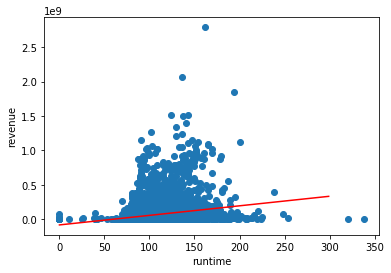

In [20]:
timelenth_rev = df[['runtime','revenue']]
a, b = np.polyfit(timelenth_rev['runtime'], timelenth_rev['revenue'], 1)
time_len = np.arange(0,300,dtype = 'float')
pred_rev = a * time_len + b 
plt.scatter(x = timelenth_rev['runtime'], y = timelenth_rev['revenue'])
plt.plot(time_len, pred_rev, linestyle='-',color = "red")
plt.xlabel('runtime')
plt.ylabel('revenue')

Again, we used an OLS regression to confirm our conjecture. The test returned a p value was smaller than 0.001, indicating a linear correlation between the movie runtime and the movie revenue.However,the R-squared value (0.041) indicates that a linear regression is a poor fitting for the correlation between the movie runtime and movie revenue.

In [21]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~runtime",timelenth_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     313.8
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           9.01e-69
Time:                        20:59:07   Log-Likelihood:            -1.4654e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7252   BIC:                         2.931e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.039e+07    8.6e+06     -9.352      0.0

## Movie release month of top 50 movie revenues

We plotted a bar graph of the release month for the 50 most profitable movies. According to the bar graph, June has the most movie release (14 movies).

In [30]:
# Select the needed column and only extract the month information
date_rev = df[['release_date','revenue']]
date_rev['release_date']=date_rev['release_date'].str[5:7]

/Users/winniexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


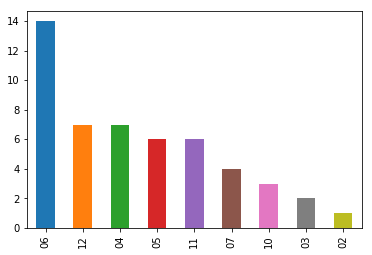

In [32]:
# Note that in this plot, the x axis represents the month and the y axis represents the movie count. 
# The order of month was sorted by the movie count. 
pd.value_counts(date_rev.head(50)['release_date']).plot.bar()
f1 = plt.gcf()

An OLS regression test was performed to provide further insight into the correlation between the release month and the movie revenue, using an alpha value of 0.05. June has a p value smaller than 0.001, indicating that June is indeed correlated with higher movie revenues.

In [33]:
date_rev.rename(columns={'release_date':'release_month'}, inplace=True)
outcome_1, predictors_1 = patsy.dmatrices("revenue~release_month",date_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     26.24
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           2.99e-54
Time:                        21:04:07   Log-Likelihood:            -1.4655e+05
No. Observations:                7254   AIC:                         2.931e+05
Df Residuals:                    7242   BIC:                         2.932e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.213e+07   6

/Users/winniexu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


## Relation between the vote average and revenue

We created a scatter plot to visualize the data and then computed a linear regression based on the scatter plot. As suggested by the plot, there is some kind of correlation between vote average and revenue.

Text(0,0.5,'revenue')

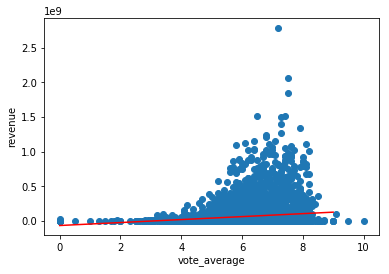

In [34]:
voteagv_rev = df[['vote_average','revenue']]
a, b = np.polyfit(voteagv_rev['vote_average'], voteagv_rev['revenue'], 1)
vot_average = np.arange(0,10,dtype = 'float')
pred_vote = a * vot_average + b
plt.scatter(x = voteagv_rev['vote_average'], y = voteagv_rev['revenue'])
plt.plot(vot_average, pred_vote, linestyle='-',color = "red")
plt.xlabel('vote_average')
plt.ylabel('revenue')

An OLS regression test has provided further information pertaining to the correlation between the average vote and the movie revenue. The test has returned a p values smaller than 0.001, which is smaller than the alpha value used (0.05). This suggests the existance of a correlation. Yet, the R-squared value is 0.022, which suggests that a linear regression is a poor fitting for the correlation between the average vote and the movie revenue.

In [35]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~vote_average",voteagv_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     163.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           5.79e-37
Time:                        21:04:59   Log-Likelihood:            -1.4661e+05
No. Observations:                7254   AIC:                         2.932e+05
Df Residuals:                    7252   BIC:                         2.932e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.423e+07   1.06e+07     -6.080   

## Relation between the budget and revenue

We plotted the scatter plot with the budget in million dollars against the movie revenue. A linear regression was computed on the same scatter plot. According to the final plot, the budget appears to have a correlation with the movie revenue.

/Users/winniexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/winniexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'revenue')

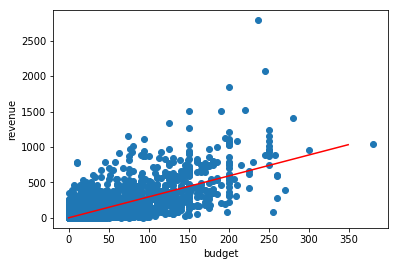

In [36]:
# Exact the necessary columns and factor each value of budgets by 1,000,000
budget_rev = df[['budget','revenue']]
budget_rev['budget'] = budget_rev['budget']/1000000
budget_rev['revenue'] = budget_rev['revenue']/1000000
a, b = np.polyfit(budget_rev['budget'], budget_rev['revenue'], 1)
budget = np.arange(0,350,dtype = 'float')
pred_budget = a * budget + b
plt.scatter(x = budget_rev['budget'], y = budget_rev['revenue'])
plt.plot(budget, pred_budget, linestyle='-',color = "red")
plt.xlabel('budget')
plt.ylabel('revenue')

The OLS regression test has returned a p value smaller than 0.001, which is smaller than the alpha value we used (0.05). Meanwhile, the R-squared value is 0.557. These two results indicate that there is a linear collrelation between the movie budget and the movie revenue.

In [37]:
outcome_1, predictors_1 = patsy.dmatrices("revenue~budget",budget_rev)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     9108.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:05:02   Log-Likelihood:                -43523.
No. Observations:                7254   AIC:                         8.705e+04
Df Residuals:                    7252   BIC:                         8.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9546      1.344      1.454      0.1

# Multiple Linear Regression

With the results of the previous linear regression analysis, we filtered out budget, popularity, runtime and vote average as the possible contributing factor of final movie revenue. We decided to ignore genre as a factor as each movie fell into multiple genres hence making it a much complex task to assign each category a dummy variable for prediction purposes. We proceeded with multiple linear regression to indicate if there are any interrelations among these 4 potential contributors. Multiple linear regression could also provide better goodness of fit and futher rule out the non-significant factors.

In [44]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['budget', 'popularity', 'runtime','vote_average']] 
y = df['revenue']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit() #multiple regression model
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

reg= LinearRegression().fit(X, y)
reg.score(X,y)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3176.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:17:43   Log-Likelihood:            -1.4302e+05
No. Observations:                7254   AIC:                         2.860e+05
Df Residuals:                    7249   BIC:                         2.861e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.598e+07    7.4e+06    -10.263   

0.6367253570884439

In [45]:
# Since the analysis above indicates that the runtime of a movie may not be an influential components, 
# we eliminated the run_time variable and perform another regression. 
X = df[['budget', 'popularity','vote_average']] 
y = df['revenue']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit() #multiple regression model
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

reg= LinearRegression().fit(X, y)
reg.score(X,y)

print(np.average(cross_val_score(reg, X, y, cv=10)))

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4235.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        21:17:44   Log-Likelihood:            -1.4302e+05
No. Observations:                7254   AIC:                         2.860e+05
Df Residuals:                    7250   BIC:                         2.861e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.344e+07   6.55e+06    -11.208   

The p-value for runtime from the previous model turned out to be 0.461, which is much larger than the critical alpha value. This shows that the total length of the movie may actually not have a significant effect in predicting the revenue of a movie.

Hence we eliminated this variable as a part of backward stepwise variable selection and only kept budget, popularity, and vote average as predictors. The accuracy score we got for this new model was the same as the last one,which further proves that run-time was not an important factor in predicting revenue for movies. 

The accuracy score of this model is 0.637 ( R^2), which is much higher than any of the simple linear regression models designed in the previous sections. Hoever, We wanted to explore if this score could get better with a non-linear model. We decided to perform a RandomForest Regression and the result is on the following section.


# Non Linear Regression

In [41]:
# Non linear Regression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
regr.fit(X, y)  

print(regr.score(X,y))  #R^2

from sklearn.model_selection import cross_val_score

print(np.average(cross_val_score(regr, X, y, cv=10))) #average of 10 fold cross validation

0.8435830500065526
0.6182275266155581


The prediction accuracy score for this model turned out to be the highest we have ever had which is a 
84% accuracy at predicting the revenue of movies. 

To show that this model was not overfitting, we carried out 10-fold cross validation, which still returned a fairly positive accuracy score : 0.618. 

We compared this to the cross-val score of the multiple linear regression model which returned a high negative number. This negative number implies that the regression model extremely underfits our test data and hence is not generally usable.

# Ethics & Privacy

Our question is about what factors contribute to a movie’s revenue. The datasets we used were extracted from two well-known movie databases. The user names or any other user information is not presented in the datasets and the datasets are themselves public, so there is no issue about the privacy or informed consent problem. The datasets included any language, any genre and from any country, so there would be no territory bias on the movies themselves. However, we were concerned about the user distribution of the two movie databases, in other words, who would make the ratings. We found that data from these two databases were frequently used to determine the contribution of factors to the revenue, while they were used to predict American movie revenues most of the time. We thought that the reason could be that they were used mainly by users from English-speaking countries and were popular in the US. As a result, our prediction may not be indicative for a non-English-speaking country, while it has a good accuracy to predict the world’s revenue. 

There is also a concern about the balance between movie revenue and diversity protection. By figuring out how the movie’s budget, popularity and vote average, etc affect the revenue, movie investors would have an easier time to decide which movie would be more profitable. However, after finding out that there is a specific type of movie that will make a higher revenue, the society will tend to have more of that type of movie being produced since less people will be willing to take a risk. This kind of studies will potentially lead to a less diverse movie market. We want to emphasize the importance of having diverse movie market here since it could be a conservation of culture and maintain the movie’s artistic value.

The movie trend at a certain time era may also affect the revenue. For example, people now may be more into action movies, and romantic movies may become more popular after a few years. Thus, there may be bias over the time frame of the data set collected. Although we are trying to use up-to-date data, the prediction model needs to be updated in the future to predict the most accurate results that reflect the trend of that particular time. 

# Conclusion & Discussion

After all, we concluded that the budget, popularity, and vote_average are the most influential factors to a movie's revenue. Throughout the process of this project, we first investigate each variable individually in order to do a brief filter for the possible components. Then we selected those with higher p-values to perform a multi-variable regression to further investigate the correlation between these variables and movie revenue. We selected average vote, budget, and popularity in our multiple linear regression model. The result shows that they had a positive correlation with the revenue and the prediction accuracy score on the training data was 63.7%. However, the model drastically failed with our test data showing a highly negative R^2 value. From this result, we thought a linear regression may not be the best regression to describe the relationship. Thus, we proceed to use a non-linear regression method and the result is exciting. Our results suggest that a non-linear model, in this case, a RandomForest Regression model does a much better job of predicting the movie revenue than linear model even with "test-data" as seen through our 10-fold cross validation method. 

If we continue on this project, our next step would be try to introduce a way to take genre into account for regressions based on multiple variables. In reality, we believe that a movie's genre would take a significant role on determine a movie's final revenue (as shown from the high revenue from Avenger seires). We didn't analyze the genre portion this time because we couldn't find a way to build a classification on genre since there were so many combination in there. It was hard to find an appropriate dataset that contains enough information to allow us compare different combinations. Another future direction would taking inflation into account in the model. This would cause the result a lot more reliable for any year in history. Of course, we could look into more robust non-linear model to produce a better model as well.

Overall, it was interesting to see that without genre, a budget, popularity, and vote_average are the most influential components for a movie's revenue. This indicates for future film investiment, one should first find a reputatble film industry to be reponsible for production (which should bring popularity at the time of probaganda). Budget wise, it may be explained by the fact that generally the more budget a movie has, the better quality it would be. A good voting score would help to gain the popularity as well. Surprisingly, the running time isn't an influential factor for a movie. This may be due to the fact that most movie are between 1.5~2 hours. But also it could be an indication that a movie's quality could overcome the uncomfotableness of sitting on the same seat for a long time (e.g. lord of the ring)